In [1]:
%matplotlib inline
import numpy as np
import imp
import matplotlib.pyplot as plt
import os,sys
sys.path.append(os.path.abspath('../src/'))
import global_signal_black_holes as gsbh

This notebook explores the impact of changing various parameters dealing with radio emission from astrophysical black holes during the cosmic dawn. 

In [15]:
imp.reload(gsbh)
gscalc_stellar=gsbh.GlobalSignal('../config/fiducial_stellar_model.yaml')
gscalc_stellar.calculate_global()
gscalc_mh=gsbh.GlobalSignal('../config/fiducial_bh_model_popiii.yaml')
gscalc_mh.calculate_global()
gscalc_ah=gsbh.GlobalSignal('../config/fiducial_bh_model_dcbh.yaml')
gscalc_ah.calculate_global()
#gscalc.set('NTIMESGLOBAL',200)
#gscalc.calculate_global()
#gscalc.set('NTIMESGLOBAL',100)
#gscalc.calculate_global()

1.0
1.0
1.0


In [3]:
imp.reload(gsbh)
gscalc_stellar_nop3=gsbh.GlobalSignal('../config/fiducial_stellar_model.yaml')
gscalc_stellar_nop3.set('F_STAR_POPIII',0.000001)
gscalc_stellar_nop3.calculate_global()
gscalc_mh_nop3=gsbh.GlobalSignal('../config/fiducial_bh_model_popiii.yaml')
gscalc_mh_nop3.set('F_STAR_POPIII',0.000001)
gscalc_mh_nop3.calculate_global()
gscalc_ah_nop3=gsbh.GlobalSignal('../config/fiducial_bh_model_dcbh.yaml')
gscalc_ah_nop3.set('F_STAR_POPIII',0.000001)
gscalc_ah_nop3.calculate_global()
#gscalc.set('NTIMESGLOBAL',200)
#gscalc.calculate_global()
#gscalc.set('NTIMESGLOBAL',100)
#gscalc.calculate_global()

1.0
1.0
1.0


We now plot the three different scenarios, large halo black holes, small halo black holes, and no black holes with and without Population III stars. 

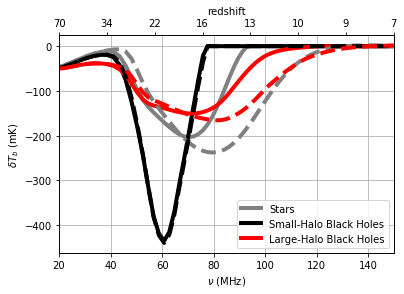

In [5]:
for key in gscalc_stellar.global_signals: 
    l0=plt.plot(1420./(1.+gscalc_stellar.global_signals[key]['Z']),
             gscalc_stellar.global_signals[key]['Tb'],
             label='Stars',
             color='grey',
             lw=4)[0]
for key in gscalc_mh.global_signals: 
    l1=plt.plot(1420./(1.+gscalc_mh.global_signals[key]['Z']),
             gscalc_mh.global_signals[key]['Tb'],
             label='Pop-III',
             color='k',
             lw=4)[0]
for key in gscalc_ah.global_signals: 
    l2=plt.plot(1420./(1.+gscalc_ah.global_signals[key]['Z']),
             gscalc_ah.global_signals[key]['Tb'],
             label='DCBH',
             color='red',
             lw=4)[0]
    
for key in gscalc_stellar_nop3.global_signals: 
    plt.plot(1420./(1.+gscalc_stellar_nop3.global_signals[key]['Z']),
             gscalc_stellar_nop3.global_signals[key]['Tb'],
             label='Stars',
             color='grey',
             ls='--',
             lw=4)
for key in gscalc_mh_nop3.global_signals: 
    plt.plot(1420./(1.+gscalc_mh_nop3.global_signals[key]['Z']),
             gscalc_mh_nop3.global_signals[key]['Tb'],
             label='Pop-III',
             color='k',
             ls='--',
             lw=4)
for key in gscalc_ah_nop3.global_signals: 
    plt.plot(1420./(1.+gscalc_ah_nop3.global_signals[key]['Z']),
             gscalc_ah_nop3.global_signals[key]['Tb'],
             label='DCBH',
             color='red',
             ls='--',
             lw=4)
    
ax1=plt.gca()
ax1.set_xlim(20,150)
ax2=ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2_xlabels=[]
for tick in ax2.get_xticks():
    ax2_xlabels.append('%d'%(1420.41/tick-1.))
ax2.set_xticklabels(ax2_xlabels)
ax2.set_xlabel('redshift')
ax1.grid()
ax1.set_xlabel('$\\nu$ (MHz)')
ax1.set_ylabel('$\\delta T_b$ (mK)')
ax1.legend((l0,l1,l2),('Stars','Small-Halo Black Holes','Large-Halo Black Holes'),loc='best')

Now lets examine Small halo black holes while adjusting escape fraction, obscuration, and growth time. 

In [9]:

gscalc_mh_fb=gsbh.GlobalSignal('../config/fiducial_bh_model_popiii.yaml')
gscalc_mh_fb.set('TAU_FEEDBACK',0.045)
gscalc_mh_fb.set('Z_SEED_MIN',18)
gscalc_mh_fb.calculate_global()

gscalc_ah_fb=gsbh.GlobalSignal('../config/fiducial_bh_model_dcbh.yaml')
gscalc_ah_fb.set('TAU_FEEDBACK',0.045)
gscalc_ah_fb.set('Z_SEED_MIN',18)
gscalc_ah_fb.calculate_global()

#gscalc_popiii_obsc=gsbh.GlobalSignal('../config/fiducial_bh_model_popiii.yaml')
#gscalc_popiii_obsc.set('TAU_FEEDBACK',0.045)
#gscalc_popiii_obsc.set('Z_SEED_MIN',16)
#gscalc_popiii_obsc.calculate_global()

#gscalc_popiii_obscX=gsbh.GlobalSignal('../config/fiducial_bh_model_popiii.yaml')
#gscalc_popiii_obscX.set('LOG10_N',24)
#gscalc_popiii_obscX.calculate_global()
gscalc_mh_slow=gsbh.GlobalSignal('../config/fiducial_bh_model_popiii.yaml')
gscalc_mh_slow.set('TAU_GROW',0.45)
gscalc_mh_slow.calculate_global()

gscalc_ah_slow=gsbh.GlobalSignal('../config/fiducial_bh_model_dcbh.yaml')
gscalc_ah_slow.set('TAU_GROW',0.45)
gscalc_ah_slow.calculate_global()

1.0
1.0
1.0
1.0


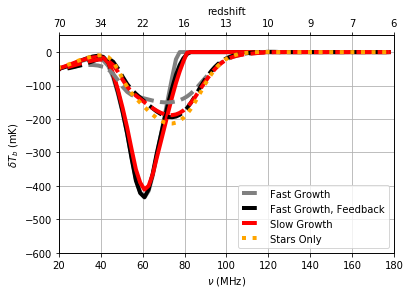

In [16]:
for key in gscalc_mh.global_signals: 
    l0=plt.plot(1420./(1.+gscalc_mh.global_signals[key]['Z']),
             gscalc_mh.global_signals[key]['Tb'],
             color='grey',
             lw=4)[0]
for key in gscalc_mh_fb.global_signals: 
    l1=plt.plot(1420./(1.+gscalc_mh_fb.global_signals[key]['Z']),
             gscalc_mh_fb.global_signals[key]['Tb'],
             color='k',
             lw=4)[0]
for key in gscalc_mh_slow.global_signals: 
    l3=plt.plot(1420./(1.+gscalc_mh_slow.global_signals[key]['Z']),
             gscalc_mh_slow.global_signals[key]['Tb'],
             color='red',
             lw=4)[0]
    
    
for key in gscalc_ah.global_signals: 
    l0=plt.plot(1420./(1.+gscalc_ah.global_signals[key]['Z']),
         gscalc_ah.global_signals[key]['Tb'],
         color='grey',ls='--',
         lw=4)[0]
for key in gscalc_ah_fb.global_signals: 
    l1=plt.plot(1420./(1.+gscalc_ah_fb.global_signals[key]['Z']),
             gscalc_ah_fb.global_signals[key]['Tb'],
             color='k',ls='--',
             lw=4)[0]
for key in gscalc_ah_slow.global_signals: 
    l3=plt.plot(1420./(1.+gscalc_ah_slow.global_signals[key]['Z']),
             gscalc_ah_slow.global_signals[key]['Tb'],
             color='red',ls='--',
             lw=4)[0]
    
for key in gscalc_stellar.global_signals: 
    l4=plt.plot(1420./(1.+gscalc_stellar.global_signals[key]['Z']),
         gscalc_stellar.global_signals[key]['Tb'],
         color='orange',ls=':',
         lw=4)[0]
    
ax1=plt.gca()
ax1.set_xlim(20,180)
ax1.set_ylim(-600,50)
ax2=ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2_xlabels=[]
for tick in ax2.get_xticks():
    ax2_xlabels.append('%d'%(1420.41/tick-1.))
ax2.set_xticklabels(ax2_xlabels)
ax2.set_xlabel('redshift')
ax1.grid()
ax1.set_xlabel('$\\nu$ (MHz)')
ax1.set_ylabel('$\\delta T_b$ (mK)')
ax1.legend((l0,l1,l3,l4),('Fast Growth','Fast Growth, Feedback','Slow Growth','Stars Only'),loc='best')
plt.savefig('vary_growth_params.pdf',bbox_inches='tight')

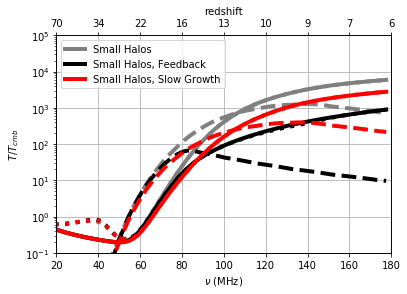

In [34]:
for key in gscalc_popiii.global_signals: 
    l0=plt.plot(1420./(1.+gscalc_popiii.global_signals[key]['Z']),
             gscalc_popiii.global_signals[key]['Tk']/2.73/(1.+gscalc_popiii.global_signals[key]['Z']),
             color='grey',
             lw=4)[0]
    plt.plot(1420./(1.+gscalc_popiii.global_signals[key]['Z']),
             gscalc_popiii.global_signals[key]['Trad']/2.73/(1.+gscalc_popiii.global_signals[key]['Z']),
             color='grey',
             lw=4,ls='--')
    plt.plot(1420./(1.+gscalc_popiii.global_signals[key]['Z']),
             gscalc_popiii.global_signals[key]['Ts']/2.73/(1.+gscalc_popiii.global_signals[key]['Z']),
             color='grey',
             lw=4,ls=':')
for key in gscalc_popiii_obsc.global_signals: 
    l1=plt.plot(1420./(1.+gscalc_popiii_obsc.global_signals[key]['Z']),
             gscalc_popiii_obsc.global_signals[key]['Tk']/2.73/(1.+gscalc_popiii_obsc.global_signals[key]['Z']),
             color='k',
             lw=4)[0]
    plt.plot(1420./(1.+gscalc_popiii_obsc.global_signals[key]['Z']),
             gscalc_popiii_obsc.global_signals[key]['Trad']/2.73/(1.+gscalc_popiii_obsc.global_signals[key]['Z']),
             color='k',
             lw=4,ls='--')
    plt.plot(1420./(1.+gscalc_popiii_obsc.global_signals[key]['Z']),
             gscalc_popiii_obsc.global_signals[key]['Ts']/2.73/(1.+gscalc_popiii_obsc.global_signals[key]['Z']),
             color='k',
             lw=4,ls=':')
    
#for key in gscalc_popiii_obscX.global_signals: 
#    l2=plt.plot(1420./(1.+gscalc_popiii_obscX.global_signals[key]['Z']),
#             gscalc_popiii_obscX.global_signals[key]['Tb'],
#             color='magenta',
#             lw=4)[0]
    
for key in gscalc_popiii_slow.global_signals: 
    l3=plt.plot(1420./(1.+gscalc_popiii_slow.global_signals[key]['Z']),
             gscalc_popiii_slow.global_signals[key]['Tk']/2.73/(1.+gscalc_popiii_slow.global_signals[key]['Z']),
             color='red',
             lw=4)[0]
    plt.plot(1420./(1.+gscalc_popiii_slow.global_signals[key]['Z']),
             gscalc_popiii_slow.global_signals[key]['Trad']/2.73/(1.+gscalc_popiii_slow.global_signals[key]['Z']),
             color='red',
             ls='--',
             lw=4)
    plt.plot(1420./(1.+gscalc_popiii_slow.global_signals[key]['Z']),
             gscalc_popiii_slow.global_signals[key]['Ts']/2.73/(1.+gscalc_popiii_slow.global_signals[key]['Z']),
             color='red',
             ls=':',
             lw=4)
    

ax1=plt.gca()
ax1.set_yscale('log')
ax1.set_xlim(20,180)
ax1.set_ylim(1e-1,1e5)
ax2=ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2_xlabels=[]
for tick in ax2.get_xticks():
    ax2_xlabels.append('%d'%(1420.41/tick-1.))
ax2.set_xticklabels(ax2_xlabels)
ax2.set_xlabel('redshift')
ax1.grid()
ax1.set_xlabel('$\\nu$ (MHz)')
ax1.set_ylabel('$T/T_{cmb}$')
ax1.legend((l0,l1,l3),('Small Halos','Small Halos, Feedback','Small Halos, Slow Growth'),loc='best')

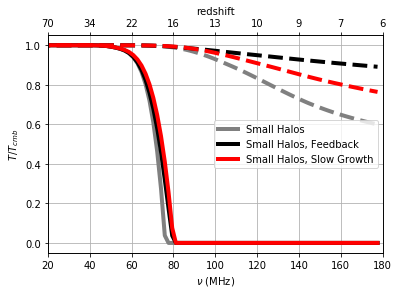

In [37]:
for key in gscalc_popiii.global_signals: 
    l0=plt.plot(1420./(1.+gscalc_popiii.global_signals[key]['Z']),
             (1.-gscalc_popiii.global_signals[key]['Q']),
             color='grey',
             lw=4)[0]
    plt.plot(1420./(1.+gscalc_popiii.global_signals[key]['Z']),
             (1.-gscalc_popiii.global_signals[key]['Xe']),
             color='grey',
             lw=4,ls='--')
for key in gscalc_popiii_obsc.global_signals: 
    l1=plt.plot(1420./(1.+gscalc_popiii_obsc.global_signals[key]['Z']),
             (1.-gscalc_popiii_obsc.global_signals[key]['Q']),
             color='k',
             lw=4)[0]
    plt.plot(1420./(1.+gscalc_popiii_obsc.global_signals[key]['Z']),
             (1.-gscalc_popiii_obsc.global_signals[key]['Xe']),
             color='k',
             lw=4,ls='--')

for key in gscalc_popiii_slow.global_signals: 
    l3=plt.plot(1420./(1.+gscalc_popiii_slow.global_signals[key]['Z']),
             (1.-gscalc_popiii_slow.global_signals[key]['Q']),
             color='red',
             lw=4)[0]
    plt.plot(1420./(1.+gscalc_popiii_slow.global_signals[key]['Z']),
             (1.-gscalc_popiii_slow.global_signals[key]['Xe']),
             color='red',
             ls='--',
             lw=4)


ax1=plt.gca()
#ax1.set_yscale('log')
ax1.set_xlim(20,180)
#ax1.set_ylim(1e-1,1e5)
ax2=ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2_xlabels=[]
for tick in ax2.get_xticks():
    ax2_xlabels.append('%d'%(1420.41/tick-1.))
ax2.set_xticklabels(ax2_xlabels)
ax2.set_xlabel('redshift')
ax1.grid()
ax1.set_xlabel('$\\nu$ (MHz)')
ax1.set_ylabel('$T/T_{cmb}$')
ax1.legend((l0,l1,l3),('Small Halos','Small Halos, Feedback','Small Halos, Slow Growth'),loc='best')

In [78]:
gscalc_popiii_moremass=gsbh.GlobalSignal('../config/fiducial_bh_model_popiii.yaml')
gscalc_popiii_moremass.set('TMIN_HALO',8e3)
gscalc_popiii_moremass.set('TMAX_HALO',1e9)
gscalc_popiii_moremass.set('R_MEAN',2.8)
gscalc_popiii_moremass.set('LOG10_N',23.65)
gscalc_popiii_moremass.set('F_ESC',.1)
gscalc_popiii_moremass.set('TAU_GROW',.1125)
gscalc_popiii_moremass.set('GBOL',0.012)
gscalc_popiii_moremass.set('FLOUD',0.1)
gscalc_popiii_moremass.set('ALPHA_R',1.1)
gscalc_popiii_moremass.set('F_STAR_POPIII',0.025)
gscalc_popiii_moremass.set('FX_POPIII',2.)
gscalc_popiii_moremass.calculate_global()

1.0


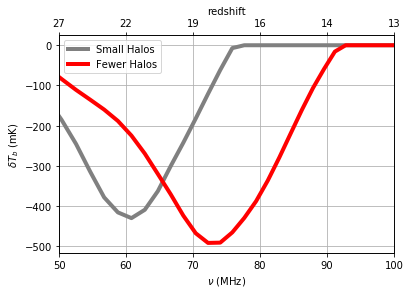

In [79]:
for key in gscalc_popiii.global_signals: 
    l0=plt.plot(1420./(1.+gscalc_popiii.global_signals[key]['Z']),
             gscalc_popiii.global_signals[key]['Tb'],
             color='grey',
             lw=4)[0]
    
for key in gscalc_popiii_moremass.global_signals: 
    l3=plt.plot(1420./(1.+gscalc_popiii_moremass.global_signals[key]['Z']),
             gscalc_popiii_moremass.global_signals[key]['Tb'],
             color='red',
             lw=4)[0]
    

ax1=plt.gca()
ax1.set_xlim(50,100)
#ax1.set_ylim(-600,50)
ax2=ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2_xlabels=[]
for tick in ax2.get_xticks():
    ax2_xlabels.append('%d'%(1420.41/tick-1.))
ax2.set_xticklabels(ax2_xlabels)
ax2.set_xlabel('redshift')
ax1.grid()
ax1.set_xlabel('$\\nu$ (MHz)')
ax1.set_ylabel('$\\delta T_b$ (mK)')
ax1.legend((l0,l3),('Small Halos','Fewer Halos'),loc='best')

Text(0,0.5,'$\\delta T_b$ (mK)')

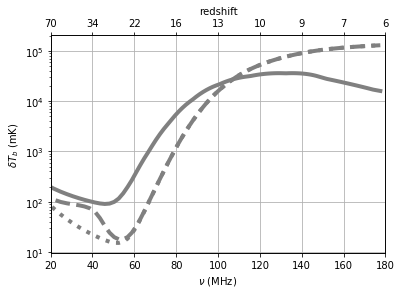

In [16]:
for key in gscalc_popiii.global_signals: 
    l0=plt.plot(1420./(1.+gscalc_popiii.global_signals[key]['Z']),
             gscalc_popiii.global_signals[key]['Trad']+2.73*(1.+gscalc_popiii.global_signals[key]['Z']),
             color='grey',
             lw=4)[0]
    plt.plot(1420./(1.+gscalc_popiii.global_signals[key]['Z']),
             gscalc_popiii.global_signals[key]['Ts'],
             color='grey',ls='--',
             lw=4)
    plt.plot(1420./(1.+gscalc_popiii.global_signals[key]['Z']),
             gscalc_popiii.global_signals[key]['Tk'],
             color='grey',ls=':',
             lw=4)
    
#for key in gscalc_popiii_moremass.global_signals: 
#    l3=plt.plot(1420./(1.+gscalc_popiii_moremass.global_signals[key]['Z']),
#             gscalc_popiii_moremass.global_signals[key]['Trad']+2.73*(1.+gscalc_popiii_moremass.global_signals[key]['Z']),
#             color='red',
#             lw=4)[0]
#    plt.plot(1420./(1.+gscalc_popiii_moremass.global_signals[key]['Z']),
#             gscalc_popiii_moremass.global_signals[key]['Ts'],
#             color='red',ls='--',
#             lw=4)
#    plt.plot(1420./(1.+gscalc_popiii_moremass.global_signals[key]['Z']),
#             gscalc_popiii_moremass.global_signals[key]['Tk'],
#             color='red',ls=':',
#             lw=4)
    
plt.yscale('log')
ax1=plt.gca()
ax1.set_xlim(20,180)
#ax1.set_ylim(-600,50)
ax2=ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2_xlabels=[]
for tick in ax2.get_xticks():
    ax2_xlabels.append('%d'%(1420.41/tick-1.))
ax2.set_xticklabels(ax2_xlabels)
ax2.set_xlabel('redshift')
ax1.grid()
ax1.set_xlabel('$\\nu$ (MHz)')
ax1.set_ylabel('$\\delta T_b$ (mK)')
#ax1.legend((l0,l3),('Small Halos','Fewer Halos'),loc='best')

Text(0,0.5,'Neutral Fraction')

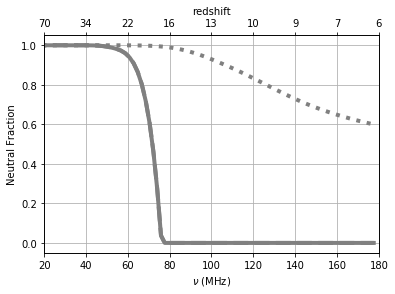

In [20]:
for key in gscalc_popiii.global_signals: 
    l0=plt.plot(1420./(1.+gscalc_popiii.global_signals[key]['Z']),
             (1.-gscalc_popiii.global_signals[key]['Q'])*(1-gscalc_popiii.global_signals[key]['Xe']),
             color='grey',
             lw=4)[0]
    plt.plot(1420./(1.+gscalc_popiii.global_signals[key]['Z']),
                 (1.-gscalc_popiii.global_signals[key]['Q']),
                 color='grey',ls='--',
                 lw=4)
    plt.plot(1420./(1.+gscalc_popiii.global_signals[key]['Z']),
               (1.-gscalc_popiii.global_signals[key]['Xe']),
               color='grey',ls=':',
               lw=4)
#for key in gscalc_popiii_moremass.global_signals: 
#    l3=plt.plot(1420./(1.+gscalc_popiii_moremass.global_signals[key]['Z']),
#             gscalc_popiii_moremass.global_signals[key]['Trad']+2.73*(1.+gscalc_popiii_moremass.global_signals[key]['Z']),
#             color='red',
#             lw=4)[0]
#    plt.plot(1420./(1.+gscalc_popiii_moremass.global_signals[key]['Z']),
#             gscalc_popiii_moremass.global_signals[key]['Ts'],
#             color='red',ls='--',
#             lw=4)
#    plt.plot(1420./(1.+gscalc_popiii_moremass.global_signals[key]['Z']),
#             gscalc_popiii_moremass.global_signals[key]['Tk'],
#             color='red',ls=':',
#             lw=4)
    
#plt.yscale('log')
ax1=plt.gca()
ax1.set_xlim(20,180)
#ax1.set_ylim(-600,50)
ax2=ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2_xlabels=[]
for tick in ax2.get_xticks():
    ax2_xlabels.append('%d'%(1420.41/tick-1.))
ax2.set_xticklabels(ax2_xlabels)
ax2.set_xlabel('redshift')
ax1.grid()
ax1.set_xlabel('$\\nu$ (MHz)')
ax1.set_ylabel('Neutral Fraction')
#ax1.legend((l0,l3),('Small Halos','Fewer Halos'),loc='best')